# AI-Based Demand Trend Analysis Using Machine Learning

*This notebook contains data analysis and machine learning implementation*
*for retail demand trend analysis using historical sales data*.

**#WEEK 2 TASKS**

**Step 1: Import Required Libraries**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Data Loading & Initial Exploration**

In [3]:
data = pd.read_excel("superstore_sales.xlsx") # Load the retail sales dataset from Excel
data.head() # Preview the dataset

# Display dataset structure and summary statistics
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


**Step 3: Detect Missing Values**

This section checks for missing values in each column of the dataset.
It helps ensure data quality before performing further analysis and
machine learning modeling.


In [4]:
# Calculate total missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


***Visualize Missing Values***

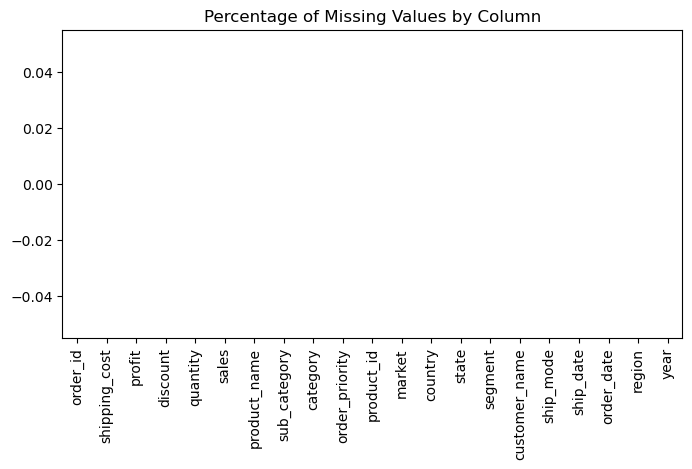

In [5]:
(missing_values / data.shape[0]).sort_values().plot(kind='bar', figsize=(8,4))
plt.title("Percentage of Missing Values by Column")
plt.show()

**Step 4: Handle Missing PRODUCT_CATEGORY**

This section checks whether any missing values exist in the `category`
column. Since no missing values are found, no imputation is required.
The step is included to demonstrate the missing-value handling approach.

In [28]:
# Check for missing values in the 'category' column
missing_category = data[data['category'].isnull()]
print("Products with missing 'category':\n",
      missing_category[['product_name', 'category']].drop_duplicates())

Products with missing 'category':
 Empty DataFrame
Columns: [product_name, category]
Index: []


***Fill missing categories***

In [29]:
# Since no missing values are found, no filling is required
# This step is shown for demonstration purposes
data['category'].fillna('Returns', inplace=True)
# Verify remaining missing values
print("Remaining missing values in 'category':",
      data['category'].isnull().sum())

Remaining missing values in 'category': 0


C:\Users\Upasana Das\AppData\Local\Temp\ipykernel_9696\2678982606.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['category'].fillna('Returns', inplace=True)


**Step 5: Identifying and Handling Duplicate Entries**

This section checks for duplicate records in the dataset to ensure data
integrity. No duplicate entries were found in this dataset. The step is
included to demonstrate the duplicate-handling process.

In [30]:
# Identify duplicate rows in the dataset
duplicate_entries = data[data.duplicated(keep=False)]

# Display number of duplicate entries
print(f"Number of duplicate entries found: {len(duplicate_entries)}")

# Remove duplicates (if any) to create a clean dataset
data_cleaned = data.drop_duplicates(keep='first')

# Verify dataset size after duplicate removal
print(f"Number of entries after removing duplicates: {data_cleaned.shape[0]}")

Number of duplicate entries found: 0
Number of entries after removing duplicates: 51290


**Step 6: Price Data Analysis (Distribution & Outliers)**

This section analyzes the distribution of product sales using a histogram.
It helps in understanding the spread of sales values and identifying
potential outliers.

`***Step 6.1: Understanding Sales Distribution***

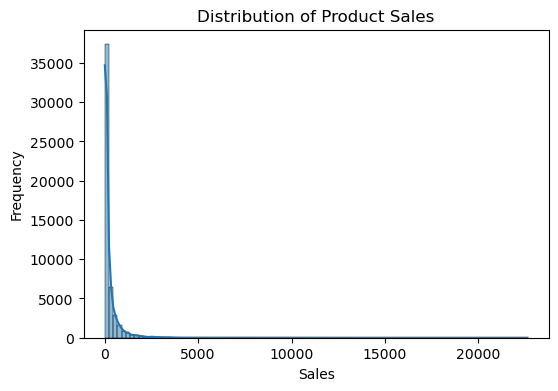

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data_cleaned['sales'], bins=100, kde=True)
plt.title("Distribution of Product Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


***Step 6.2: Outlier Detection using Boxplot***

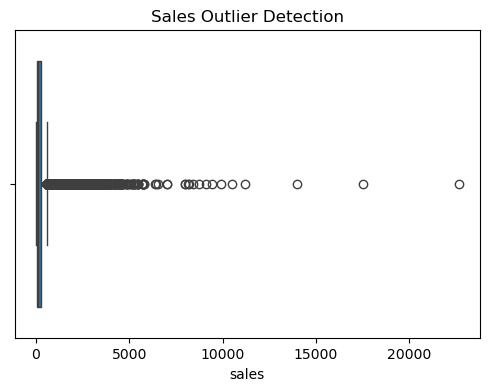

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data_cleaned['sales'])
plt.title("Sales Outlier Detection")
plt.show()

***Step 6.3: Outlier Treatment (IQR Method)***

This section handles outliers in the `sales` variable using the
Interquartile Range (IQR) method. Outliers are removed to reduce the
impact of extreme values on analysis and model performance.

In [31]:
# Calculate first and third quartiles for sales
Q1 = data_cleaned['sales'].quantile(0.25)
Q3 = data_cleaned['sales'].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the dataset
data_cleaned = data_cleaned[
    (data_cleaned['sales'] >= lower_bound) &
    (data_cleaned['sales'] <= upper_bound)
]

**Step 7: Date Feature Engineering**

This section extracts useful time-based features such as year, month,
and day from the order date. These features help in analyzing temporal
patterns in sales data.

In [32]:
# Convert order_date to datetime format
data_cleaned['order_date'] = pd.to_datetime(data_cleaned['order_date'])

# Extract year, month, and day from order_date
data_cleaned['year'] = data_cleaned['order_date'].dt.year
data_cleaned['month'] = data_cleaned['order_date'].dt.month
data_cleaned['day'] = data_cleaned['order_date'].dt.day

# Preview newly created date features
data_cleaned[['order_date', 'year', 'month', 'day']].head()

,order_date,year,month,day
0,2011-01-01,2011,1,1
1,2011-01-01,2011,1,1
2,2011-01-01,2011,1,1
3,2011-01-01,2011,1,1
4,2011-01-01,2011,1,1


**Step 8: Exploratory Data Analysis**

This section analyzes the monthly sales trend by aggregating total sales
for each month. The visualization helps identify seasonal patterns and
overall demand behavior across different months.

***📈 Monthly Sales Trend***

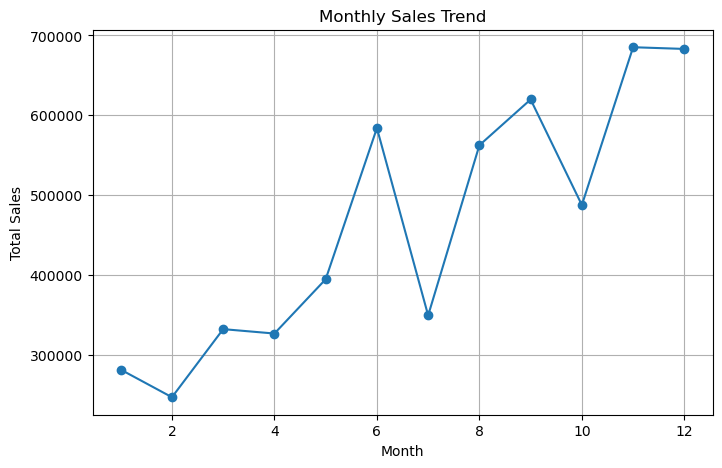

In [33]:
# Aggregate total sales by month
monthly_sales = data_cleaned.groupby('month')['sales'].sum()

# Plot monthly sales trend
plt.figure(figsize=(8,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


***📊 Category-wise Revenue***

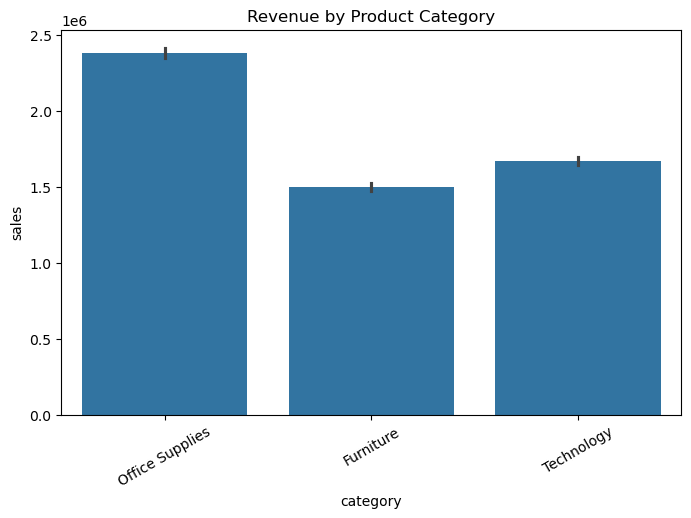

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='sales', data=data_cleaned, estimator=sum)
plt.title("Revenue by Product Category")
plt.xticks(rotation=30)
plt.show()

**Step 9: Correlation Analysis**

This section analyzes the correlation between key numerical features such
as sales, quantity, discount, profit, shipping cost, and month. A correlation
heatmap is used to understand relationships between variables and support
feature selection for the machine learning model.

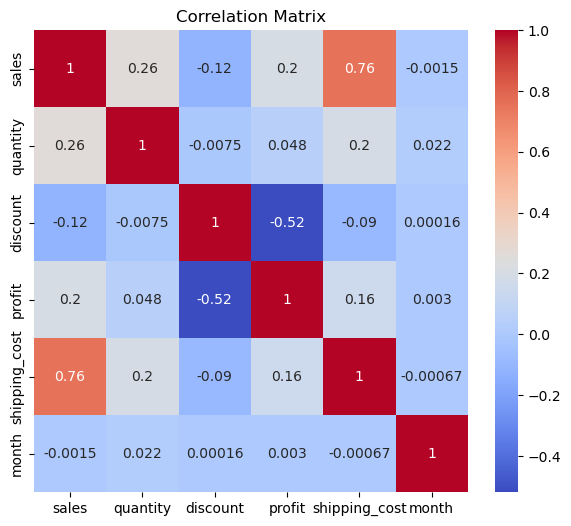

In [34]:
# Select numerical features for correlation analysis
corr_features = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'month']

# Compute correlation matrix
corr_matrix = data_cleaned[corr_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**#WEEK 3 TASKS: Prototype, Implementation & Evaluation**

**1️⃣ Implementation Setup (Reproducibility)**

This section prepares the environment for model development by importing
the required libraries and setting a fixed random seed to ensure
reproducible results.

In [35]:
# Import core libraries for numerical computation and data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import machine learning utilities and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [17]:
data_cleaned.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,day
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,1,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,1,1


**2️⃣Feature Selection**

This section selects relevant input features for predicting sales.
Features are chosen based on exploratory analysis and correlation
results to build the machine learning models.

In [36]:
# Define input features and target variable
features = ['quantity', 'discount', 'month']
target = 'sales'

# Create feature matrix (X) and target vector (y)
X = data_cleaned[features]
y = data_cleaned[target]

**3️⃣Train–Test Split**

The dataset is split into training and testing sets to evaluate model
performance on unseen data.

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

**4️⃣Baseline Model**

Linear Regression is used as the baseline supervised learning model to
predict sales. It provides a simple and interpretable reference point
for evaluating more advanced models.

*Linear Regression*

In [39]:
# Initialize and train the baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

*Baseline Evaluation*

The baseline model is evaluated using standard regression metrics:
RMSE, MAE, and R² to assess prediction accuracy.

In [40]:
# Evaluate baseline model performance
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Baseline – Linear Regression")
print("RMSE:", rmse_baseline)
print("MAE:", mae_baseline)
print("R²:", r2_baseline)

Baseline – Linear Regression
RMSE: 126.1526712982804
MAE: 95.48748737744162
R²: 0.08102407175737669


**5️⃣Prototype AI Model**

A Random Forest Regressor is implemented as a prototype model to capture
non-linear relationships in the data and improve prediction performance
over the baseline model.

*Random Forest Regressor*

In [41]:
## Initialize Random Forest Regressor with fixed random state
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Train the prototype model
rf_model.fit(X_train, y_train)

#Generate predictions using the prototype model
y_pred_rf = rf_model.predict(X_test)

**6️⃣Prototype Evaluation**

The Random Forest prototype model is evaluated using the same metrics
as the baseline model to allow fair comparison.

In [43]:
# Evaluate prototype model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Prototype – Random Forest")
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R²:", r2_rf)

Prototype – Random Forest
RMSE: 122.76826869224962
MAE: 90.822265937778
R²: 0.12967091754630533


**7️⃣Baseline vs Prototype Comparison**

This section compares the baseline Linear Regression model and the
prototype Random Forest model using RMSE, MAE, and R² metrics to
evaluate relative performance.

In [44]:
# Create a comparison table for baseline and prototype models
comparison = pd.DataFrame({
    "Model": ["Linear Regression (Baseline)", "Random Forest (Prototype)"],
    "RMSE": [rmse_baseline, rmse_rf],
    "MAE": [mae_baseline, mae_rf],
    "R²": [r2_baseline, r2_rf]
})
# Display comparison results
comparison

,Model,RMSE,MAE,R²
0,Linear Regression (Baseline),126.152671,95.487487,0.081024
1,Random Forest (Prototype),122.768269,90.822266,0.129671


**8️⃣Visualization (Prototype Output)**

This visualization compares actual sales values with predicted sales
from the Random Forest prototype model to assess prediction accuracy.

*Actual vs Predicted Sales*

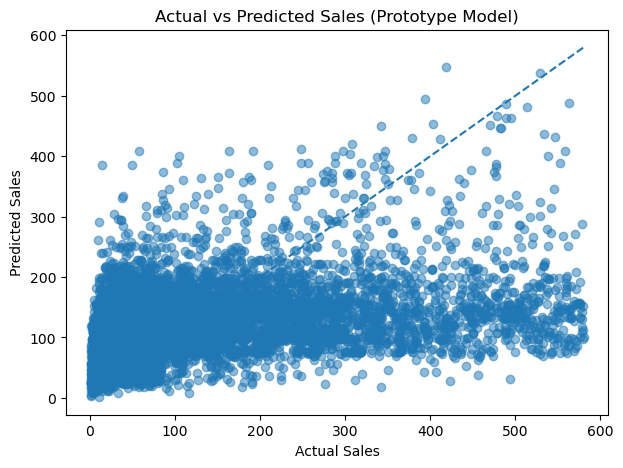

In [45]:
# Scatter plot of actual vs predicted sales
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Prototype Model)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.show()

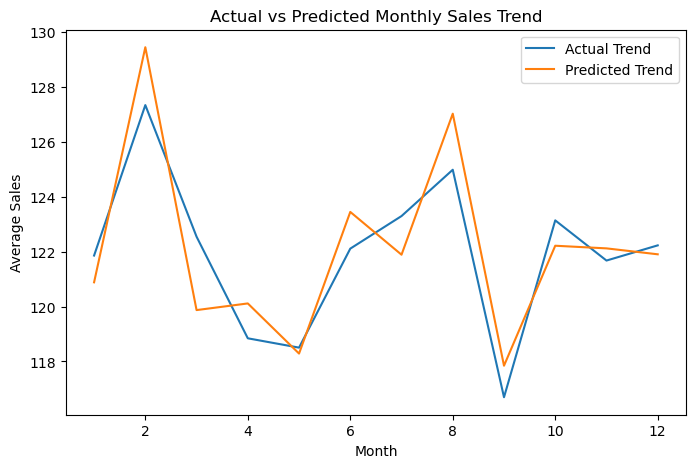

In [26]:
monthly_actual = data_cleaned.groupby('month')['sales'].mean()

data_cleaned['predicted_sales'] = rf_model.predict(X)

monthly_predicted = data_cleaned.groupby('month')['predicted_sales'].mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_actual.index, monthly_actual.values, label='Actual Trend')
plt.plot(monthly_predicted.index, monthly_predicted.values, label='Predicted Trend')
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Actual vs Predicted Monthly Sales Trend")
plt.legend()
plt.show()

**9️⃣Sanity Check**

This section performs a sanity check by training the baseline model on a
random subset of the dataset. It helps verify that the model behaves
consistently and produces reasonable error values.

In [46]:
# Randomly sample a subset of the cleaned data
sample_data = data_cleaned.sample(frac=0.3, random_state=RANDOM_STATE)

# Prepare features and target for sanity check
X_s = sample_data[features]
y_s = sample_data[target]

# Train-test split on the sampled data
X_tr, X_te, y_tr, y_te = train_test_split(
    X_s, y_s, test_size=0.2, random_state=RANDOM_STATE
)

# Train baseline model and evaluate RMSE on sampled data
baseline_model.fit(X_tr, y_tr)
print("Sanity Check RMSE:",
      np.sqrt(mean_squared_error(y_te, baseline_model.predict(X_te))))

Sanity Check RMSE: 126.49131173157602
